**Dataset:** Power Quality

**Repositorio:** Github

**Enlace:** https://github.com/Jheiden7/Power_Quality/blob/main/Dataset/No%20depurado/Power%20Quality-noDepurada.xlsx

**Tarea a realizar:** Analítica de datos

**Cantidad de atributos:** 9

**Cantidad de observaciones:** 542

**Objetivo:** Realizar un análisis exploratorio incial de los datos con el fin de encontrar estadísticas, resúmenes informativos, tendencias, patrones y comportamientos que permitan realizar deducciones sobre estos, además de detectar los rangos donde un valor se podría considerar atípico y analizar en qué casos debería descartarse o no un dato.

**Información de atributos:**

||||
|---|---|---|
|**Variable**|**Tipo**|**Descripción**|
|Date|Categórica|Fecha en MM-DD-YYYY de la toma de los datos.|
|Voltage|Numérica|Voltaje suministrado a la carga, expresado en voltios (V).|
|Current|Numérica|Corriente consumida por la carga, expresada en amperios (A).|
|Power|Numérica|Potencia consumida por la carga, expresada en vatios (W).|
|Energy|Numérica|Energía consumida por la carga, expresada en kilovatios hora (kWh).|
|Frequency|Numérica|Frecuencia de la red eléctrica a la que está conectada la carga, expresada en hercios (Hz).|
|PF|Numérica|Factor de potencia de la carga.|
|Reactive|Numérica|Potencia reactiva de la carga, expresada en voltio-amperio reactivo (VAr).|
|Aparent|Numérica|Potencia aparente de la carga, expresada en voltio-amperio (VA).|

In [ ]:
!pip install ydata_profiling #Instalación de librería para realizar Data Profiling

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

from ydata_profiling import ProfileReport

# Carga de los datos

Se carga el dataset. En este caso es un archivo Excel que se extrajo de la base de datos descargada desde MySQL

In [23]:
data = pd.read_excel('Power Quality-noDepurada.xlsx')
data.head()

ID               Fecha                                         Mediciones
0  16 2024-05-03 16:03:36  {"Voltage":5531.600098,"Current":332395.9688,"...
1  17 2024-05-03 16:03:38  {"Voltage":116,"Current":0.456999987,"Power":5...
2  18 2024-05-03 16:03:39  {"Voltage":115.9000015,"Current":0.458000004,"...
3  19 2024-05-03 16:03:40  {"Voltage":115.9000015,"Current":0.458000004,"...
4  20 2024-05-03 16:03:41  {"Voltage":115.9000015,"Current":0.458999991,"...

Ya que la columna de las mediciones está expresada en forma de JSON, hay que extraer cada llave y su valor correspondiente para llevarlo a formato de DataFrame y facilitar el procesamiento.

In [24]:
#Se convierte la columna de mediciones a una lista de diccionarios.
diccionario = data['Mediciones'].apply(json.loads)

In [25]:
#Se normaliza la lista de los diccionarios para obtener las columnas y se crea un nuevo DataFrame
PowerQuality = pd.json_normalize(diccionario)

In [26]:
PowerQuality['Date'] = data['Fecha'] #Se añade la columna de fecha al nuevo DataFrame

In [27]:
PowerQuality.head()

Voltage      Current         Power      Energy    Frequency  \
0  5531.600098  332395.9688  7.016072e+07  665448.375  6125.799805   
1   116.000000       0.4570  5.260000e+01       0.066    59.900002   
2   115.900002       0.4580  5.270000e+01       0.066    59.900002   
3   115.900002       0.4580  5.270000e+01       0.066    59.900002   
4   115.900002       0.4590  5.270000e+01       0.066    59.900002   

           PF  Reactive       Aparent                Date  
0  328.640015       NaN  1.838682e+09 2024-05-03 16:03:36  
1    0.990000  7.478259  5.301200e+01 2024-05-03 16:03:38  
2    0.990000  7.488163  5.308220e+01 2024-05-03 16:03:39  
3    0.990000  7.488163  5.308220e+01 2024-05-03 16:03:40  
4    0.990000  7.504512  5.319810e+01 2024-05-03 16:03:41

A partir de esta descripción, es posible determinar los valores promedios, las desviaciones estándar, máximos y mínimos de cada variable por separado, lo que sirve para un primer acercamiento a grandes rasgos de cómo se compone el dataset.

In [28]:
PowerQuality.describe() #Información estadística de los datos

Voltage        Current         Power         Energy    Frequency  \
count   542.000000     542.000000  5.420000e+02     542.000000   542.000000   
mean    125.257934     613.753950  1.295023e+05    1227.839906    71.106643   
min     114.400002       0.442000  5.090000e+01       0.066000    59.799999   
25%     114.800003       0.467000  5.330000e+01       0.069000    59.900002   
50%     115.000000       0.472000  5.380000e+01       0.071000    59.900002   
75%     116.000000       0.479000  5.470000e+01       0.081000    59.900002   
max    5531.600098  332395.968800  7.016072e+07  665448.375000  6125.799805   
std     232.652275   14277.608861  3.013659e+06   28583.451954   260.552068   

               PF    Reactive       Aparent                           Date  
count  542.000000  541.000000  5.420000e+02                            542  
mean     1.596070    6.453815  3.392456e+06  2024-05-03 16:19:06.127306240  
min      0.980000    0.000000  5.110440e+01            2024-05-03 16:03:36  
25%      0.990000    7.533840  5.389738e+01            2024-05-03 16:06:24  
50%      0.990000    7.634266  5.434125e+01            2024-05-03 16:09:21  
75%      0.990000    7.707353  5.524250e+01     2024-05-03 16:27:12.500000  
max    328.640015   10.830632  1.838682e+09            2024-05-03 17:05:48  
std     14.073707    2.794239  7.897813e+07                            NaN

# Análisis Exploratorio Inicial

## Profile Report

Para la generación del report se omitirá la primera fila ya que por alguna razón, hace que el entorno colapse y no se pueda generar el documento. No obstante, para el resto de la analítica, sí se tendrá en cuenta.

In [29]:
profile = ProfileReport(PowerQuality[1:], title="Power Quality Report", explorative=True) #Se genera un reporte

In [30]:
profile.to_file("PowerQuality.html") #Se guarda el reporte

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Para un primer acercamiento y un análisis rápido, se utiliza un ProfileReport para observar distintos valores estadísticos, tendencias, alertas, correlaciones, etc.

En este caso se observa que se están presentando muchas alertas debido a:

- Altas correlaciones entre las variables, lo cual es de entender ya que la mayoría comparten relación de forma matemática.

- Desbalance en PF, esto debido a que al usar diferentes cargas, hubo un cambio significativo en el factor de potencia obtenido, además de que se tomaron más muestras con unas cargas que con otras, por lo que hay un desbalance en la cantidad de valores que tomó el factor de potencia.

- La potencia reactiva tiene 15.7% de ceros, esto debido a que en algunos momentos se obtuvo un factor de potencia de 1, haciendo que la potencia reactiva se igualara a cero.

- El dataset tiene 2 filas duplicadas, esto puede deberse a un error ya que no debería ser posible obtener exactamente las mismas mediciones ya que se está teniendo una variable datetime, por lo que una fila duplicada implica que se obtuvieron los mismos valores a la misma fecha y hora. Probablemente estas filas duplicadas se deban eliminar en caso de que se desee realizar otro tipo de aplicación con este dataset.

In [31]:
profile.to_notebook_iframe() #Se muestra el reporte

## Variables duplicadas

In [33]:
PowerQuality.duplicated().sum() #Se observa la cantidad de filas duplicadas

2

Ya que las filas duplicadas nos brindan la misma información, no se gana nada conservándolas, por lo que se eliminarán las filas duplicadas.

In [34]:
PowerQuality.drop_duplicates(inplace=True) #Se eliminan los duplicados

In [36]:
PowerQuality.info() #Se observa nuevamente la información del dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 0 to 541
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Voltage    540 non-null    float64       
 1   Current    540 non-null    float64       
 2   Power      540 non-null    float64       
 3   Energy     540 non-null    float64       
 4   Frequency  540 non-null    float64       
 5   PF         540 non-null    float64       
 6   Reactive   539 non-null    float64       
 7   Aparent    540 non-null    float64       
 8   Date       540 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(8)
memory usage: 42.2 KB


## Análisis de atípicos y datos no válidos

En este caso se buscarán filas en donde existan datos faltantes, datos anormales o datos no válidos, con el fin de determinar qué se hará con ellos y buscarles una posible explicación a la presencia de estos.

### Datos nulos

In [37]:
PowerQuality.isna().sum() #Se observa en qué columna existe algún valor nulo.

Voltage      0
Current      0
Power        0
Energy       0
Frequency    0
PF           0
Reactive     1
Aparent      0
Date         0
dtype: int64

In [38]:
PowerQuality['Reactive'].isna() #Se detecta la fila en donde aparece el dato nulo

0       True
1      False
2      False
3      False
4      False
       ...  
537    False
538    False
539    False
540    False
541    False
Name: Reactive, Length: 540, dtype: bool

Cómo se puede observar, el dato nulo aparece en la primera fila del dataframe, donde a simple vista se puede deducir que todos los valores allí presentes podrían ser no válidos.

In [40]:
PowerQuality.iloc[0] #Se observa la fila 0

Voltage              5531.600098
Current              332395.9688
Power                 70160720.0
Energy                665448.375
Frequency            6125.799805
PF                    328.640015
Reactive                     NaN
Aparent             1838681600.0
Date         2024-05-03 16:03:36
Name: 0, dtype: object

**¿Borrar o imputar?**

Cuando se presentan datos faltantes, una de las soluciones puede ser realizar una imputación de datos por algún método como interpolación, esto con el fin de ingresar el posible valor del mismo dependiendo de los valores que ha tenido previa y posteriormente. Sin embargo, en este caso no se considera necesario realizar una imputación debido a que es una única fila en donde falta el dato, además de que es una fila en donde todos los demás datos presentan anormalidades.

Con todo lo anteriormente dicho, lo más prudente sería eliminar dicha fila y proceder con el análisis, no obstante, por fines de continuar con la analítica, se decide omitir este paso y conservar la fila por ahora.

### Atípicos

En el paso anterior se pudo observar que existe una fila donde hay datos no-comunes, mismos datos que seguramente sean los responsables de elevar el promedio y la desviación estándar cuando se realizó el describe(). Ahora se procederá a observar estos y analizarlos mediante el diagrama de caja.

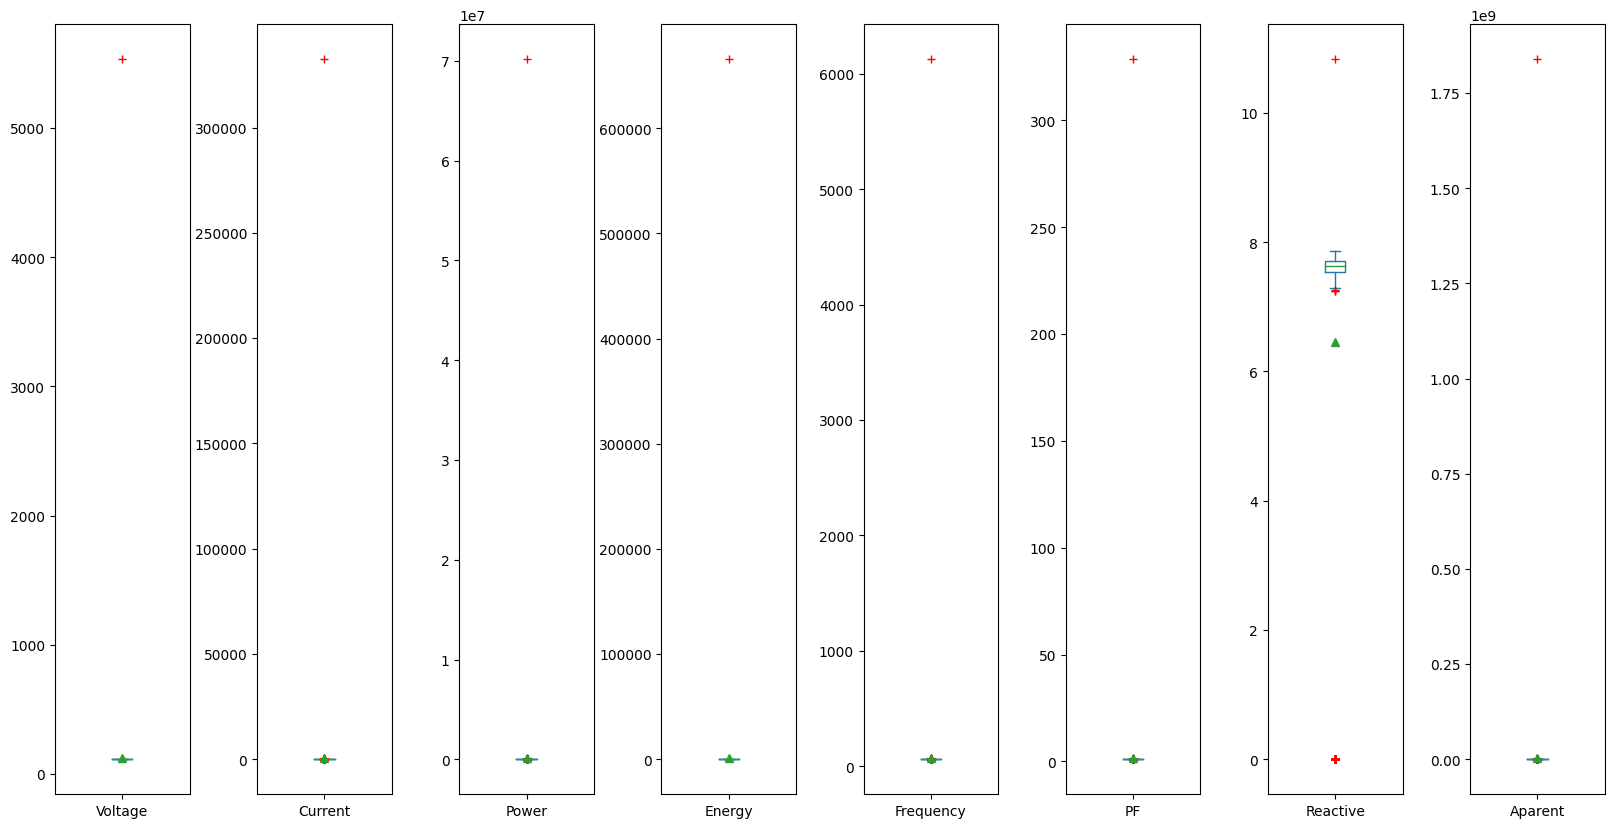

In [41]:
PowerQuality.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(20,10),
    showmeans=True,
    flierprops=dict(markeredgecolor='r',marker='+'),
)

plt.subplots_adjust(wspace=0.5)
plt.show()

Al observar el boxplot, es posible contemplar cómo todas las variables poseen un dato atípico tan alejado de la media que incluso no permite la visualización del diagrama de caja alrededor.

**Posible explicación:** Estos datos atípicos corresponden a la primera fila del dataset, por lo que podría deberse a:

- Un error de MySQL al momento de almacenar.
- Un error de la ESP32 al momento de transmitir.
- Un error de lectura del sensor PZEM-004T.

En la electrónica, es muy común que al momento de energizar un dispositivo, se generen picos de algunas variables eléctricas que luego se estabilizan de manera casi instantánea. Si bien puede que estos datos no correspondan exclusivamente a esa causa, lo cierto es que es importante conocer e identificar estos fenómenos para así tomar acción al momento de implementar un sistema inteligente.

Tras todo el seguimiento a estas variables, finalmente es el momento de NO eliminar la fila sino que más bien, establecer umbrales para que únicamente se tengan en cuenta los datos que están dentro de cierto rango.

Para seleccionar el umbral, se puede usar como apoyo el .describe() o el Profile Report. En este caso, se tomará la segunda opción debido a que se generó sin incluir esa fila, por lo que su información estadística no está sesgada como sí podría pasar en la descripción de pandas.

Debido a que casi todas las variables se producen a partir del voltaje y la corriente, se usarán estas dos para definir los umbrales a partir de los cuáles se van a conservar los datos.

- Para el voltaje se establece un rango que va desde 105V hasta 125V, cualquier valor fuera de ese rango, no se tendrá en cuenta. No obstante, hay que saber que ambos extremos no son una buena señal comparado al valor normal de la red eléctrica en Colombia.

- Para la corriente, se establece un umbral donde se admiten todos los datos que estén por debajo de 100A, esto debido a que cualquier dato que sobrepase ese valor sería inválido ya que el límite de medición del PZEM-004T, es de 100A.

In [42]:
#Se establecen los umbrales que definen los valores que se van a conservar.
PowerQuality = PowerQuality[(PowerQuality['Voltage'] > 105) & (PowerQuality['Voltage'] < 125) & (PowerQuality['Current'] < 100)]

Se observa el encabezado del dataframe

In [43]:
PowerQuality.head()

Voltage  Current      Power  Energy  Frequency    PF  Reactive  \
1  116.000000    0.457  52.599998   0.066  59.900002  0.99  7.478259   
2  115.900002    0.458  52.700001   0.066  59.900002  0.99  7.488163   
3  115.900002    0.458  52.700001   0.066  59.900002  0.99  7.488163   
4  115.900002    0.459  52.700001   0.066  59.900002  0.99  7.504512   
5  115.900002    0.465  53.400002   0.066  59.900002  0.99  7.602611   

     Aparent                Date  
1  53.011997 2024-05-03 16:03:38  
2  53.082203 2024-05-03 16:03:39  
3  53.082203 2024-05-03 16:03:40  
4  53.198101 2024-05-03 16:03:41  
5  53.893501 2024-05-03 16:03:42

Se revisa nuevamente la información y se puede observar que la cantidad de datos ha disminuido y ya no hay presencia de datos faltantes debido a que la fila en donde estaba dicho valor, corresponde con la de los datos atípicos/no válidos.

In [44]:
PowerQuality.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539 entries, 1 to 541
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Voltage    539 non-null    float64       
 1   Current    539 non-null    float64       
 2   Power      539 non-null    float64       
 3   Energy     539 non-null    float64       
 4   Frequency  539 non-null    float64       
 5   PF         539 non-null    float64       
 6   Reactive   539 non-null    float64       
 7   Aparent    539 non-null    float64       
 8   Date       539 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(8)
memory usage: 42.1 KB


Resulta posible observar un cambio en la descripción estadística de los datos, observando cómo ha disminuido en gran medida tanto los valores promedios como la desviación estándar de las características, lo que refleja el gran sesgo que estaba ocasionando dicha fila en el dataset.

In [45]:
PowerQuality.describe()

Voltage     Current       Power      Energy   Frequency          PF  \
count  539.000000  539.000000  539.000000  539.000000  539.000000  539.000000   
mean   115.263636    0.478158   54.628942    0.075531   59.915029    0.991558   
min    114.400002    0.442000   50.900002    0.066000   59.799999    0.980000   
25%    114.800003    0.467000   53.299999    0.069000   59.900002    0.990000   
50%    115.000000    0.472000   53.799999    0.071000   59.900002    0.990000   
75%    116.000000    0.479000   54.700001    0.081000   59.900002    0.990000   
max    116.400002    0.523000   60.099998    0.094000   60.000000    1.000000   
std      0.590015    0.020177    2.326583    0.008970    0.050431    0.003681   

         Reactive     Aparent                           Date  
count  539.000000  539.000000                            539  
mean     6.449184   55.108604  2024-05-03 16:19:10.046382080  
min      0.000000   51.104401            2024-05-03 16:03:38  
25%      7.533671   53.890802            2024-05-03 16:06:24  
50%      7.634266   54.334797            2024-05-03 16:09:22  
75%      7.707353   55.242500            2024-05-03 16:27:20  
max     10.830632   60.197300            2024-05-03 17:05:48  
std      2.798386    2.199971                            NaN

Se realiza nuevamente el boxplot para observar los cambios sin la presencia de dicha fila.

Se puede observar que ha habido un cambio significativo en los diagramas, y aunque haya presencia de algunos valores atípicos para ciertas variables, estos están dados principalmente por el desbalance de las mismas, como se analizó con el factor de potencia al momento de realizar el report, entonces no son valores fuera de lo normal.

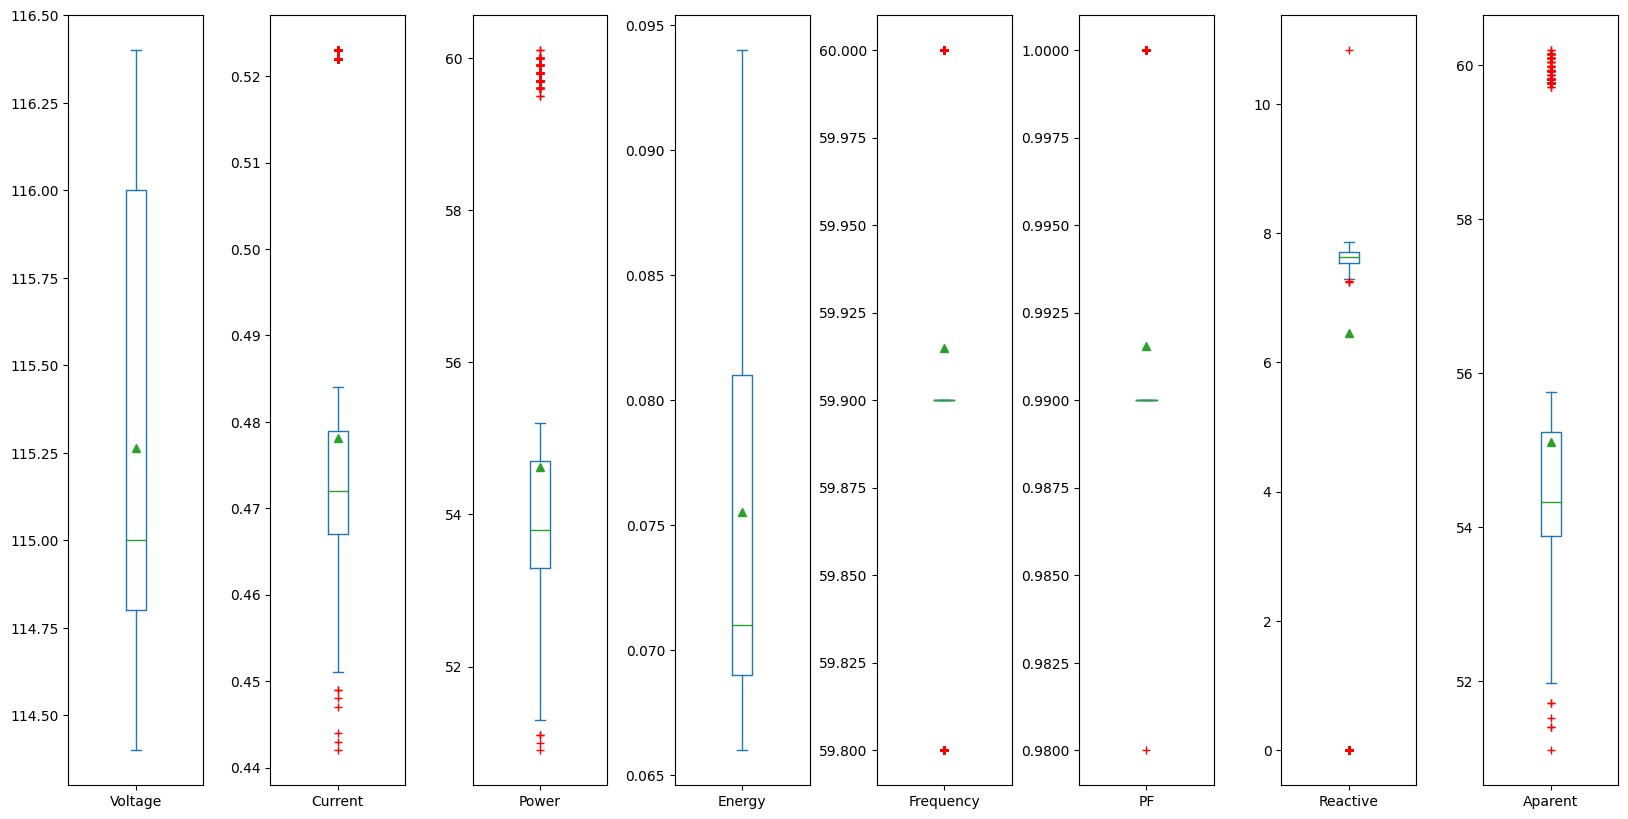

In [46]:
PowerQuality.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(20,10),
    showmeans=True,
    flierprops=dict(markeredgecolor='r',marker='+'),
)

plt.subplots_adjust(wspace=0.5)
plt.show()

## Histogramas

Con esto se busca observar la distribución de las variables y observar cuáles son los rangos de valores que aparecen con mayor frecuencia en el dataset.

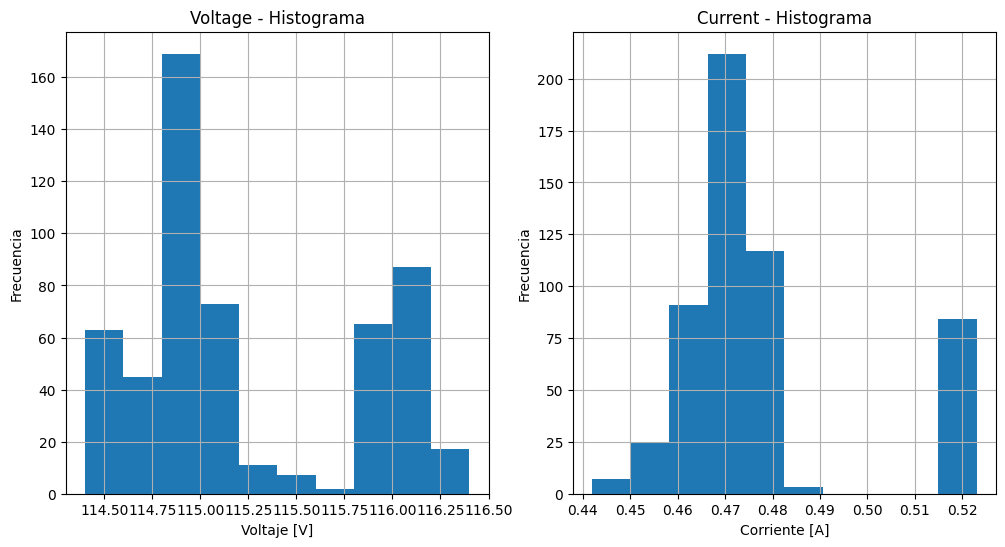

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.hist(PowerQuality['Voltage'])
plt.title('Voltage - Histograma')
plt.xlabel('Voltaje [V]')
plt.ylabel('Frecuencia')
plt.grid()
plt.subplot(1, 2, 2)
plt.hist(PowerQuality['Current'])
plt.title('Current - Histograma')
plt.xlabel('Corriente [A]')
plt.ylabel('Frecuencia')
plt.grid()

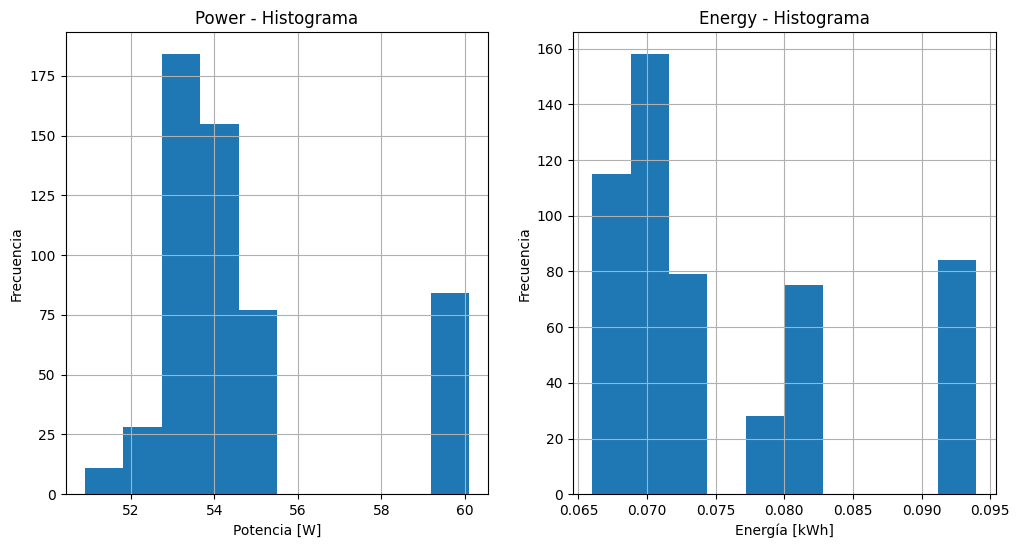

In [48]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.hist(PowerQuality['Power'])
plt.title('Power - Histograma')
plt.xlabel('Potencia [W]')
plt.ylabel('Frecuencia')
plt.grid()
plt.subplot(1, 2, 2)
plt.hist(PowerQuality['Energy'])
plt.title('Energy - Histograma')
plt.xlabel('Energía [kWh]')
plt.ylabel('Frecuencia')
plt.grid()

Aquí resulta posible observar claramente el desbalanceo de las variables, donde existe un valor que se repite muchísimo más que el resto.

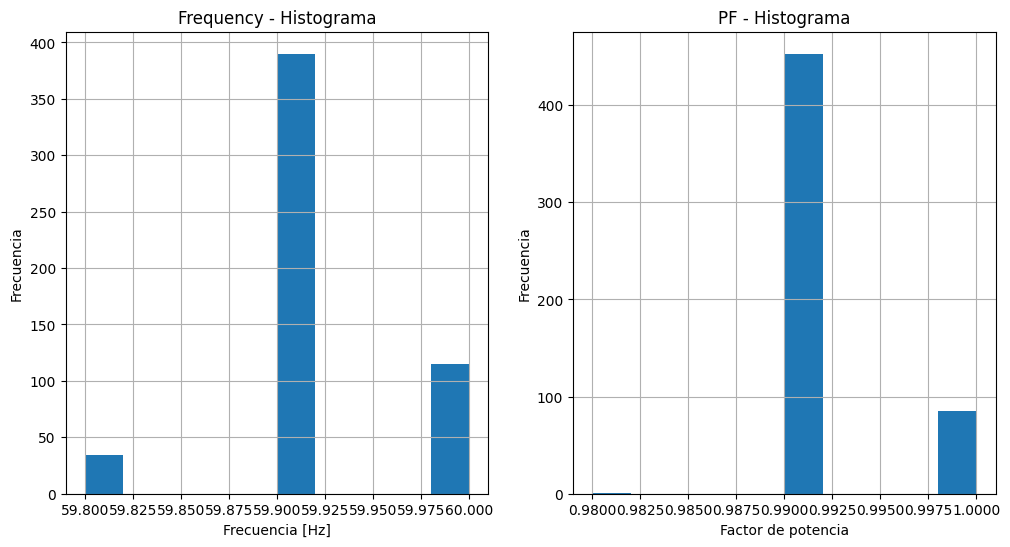

In [50]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.hist(PowerQuality['Frequency'])
plt.title('Frequency - Histograma')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Frecuencia')
plt.grid()
plt.subplot(1, 2, 2)
plt.hist(PowerQuality['PF'])
plt.title('PF - Histograma')
plt.xlabel('Factor de potencia')
plt.ylabel('Frecuencia')
plt.grid()

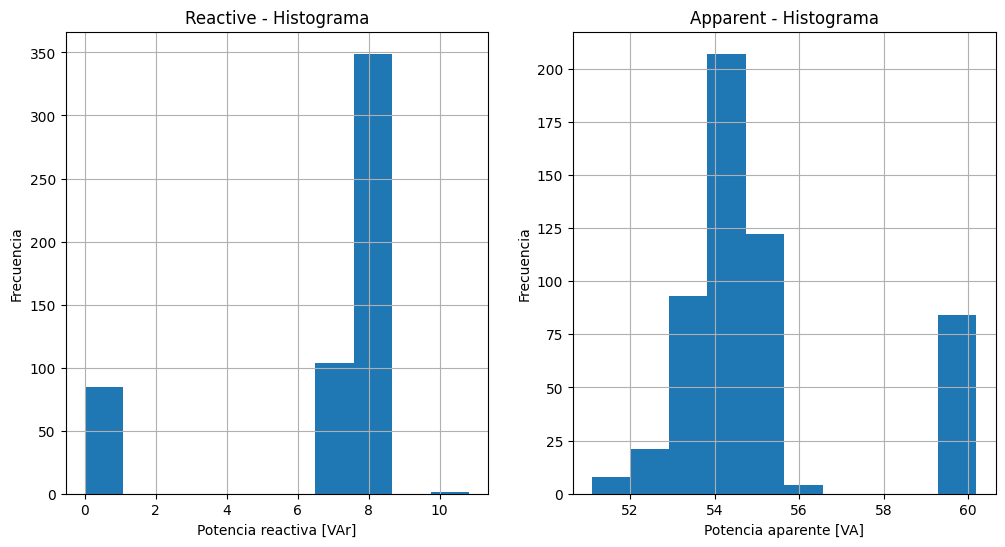

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.hist(PowerQuality['Reactive'])
plt.title('Reactive - Histograma')
plt.xlabel('Potencia reactiva [VAr]')
plt.ylabel('Frecuencia')
plt.grid()
plt.subplot(1, 2, 2)
plt.hist(PowerQuality['Aparent'])
plt.title('Apparent - Histograma')
plt.xlabel('Potencia aparente [VA]')
plt.ylabel('Frecuencia')
plt.grid()